## Panda explode

What does the moethod explode used for?
Transform each element of a list-like to a row, replicating index values.

**Notes**
-----------------

This routine will explode list-likes including lists, tuples, sets, Series, and np.ndarray. The result dtype of the subset rows will be object. Scalars will be returned unchanged, and empty list-likes will result in a np.nan for that row. In addition, the ordering of rows in the output will be non-deterministic when exploding sets.


In [12]:
#import pandas first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Hobbies': [['Reading', 'Swimming'], ['Cycling'], ['Hiking', 'Skiing', 'Cooking']]
}

In [6]:
df = pd.DataFrame(data)

In [7]:
# Display the original DataFrame
print("Original DataFrame:")
df.head()


Original DataFrame:


,Name,Hobbies
0,Alice,"[Reading, Swimming]"
1,Bob,[Cycling]
2,Charlie,"[Hiking, Skiing, Cooking]"


## How many hoppies does every student have?

In [8]:
# Step 3: Use the explode function
df_exploded = df.explode('Hobbies')

In [ ]:
df_exploded

,Name,Hobbies
0,Alice,Reading
0,Alice,Swimming
1,Bob,Cycling
2,Charlie,Hiking
2,Charlie,Skiing
2,Charlie,Cooking


In [9]:
df_exploded.groupby('Name').count()

,Hobbies
Name,
Alice,2
Bob,1
Charlie,3


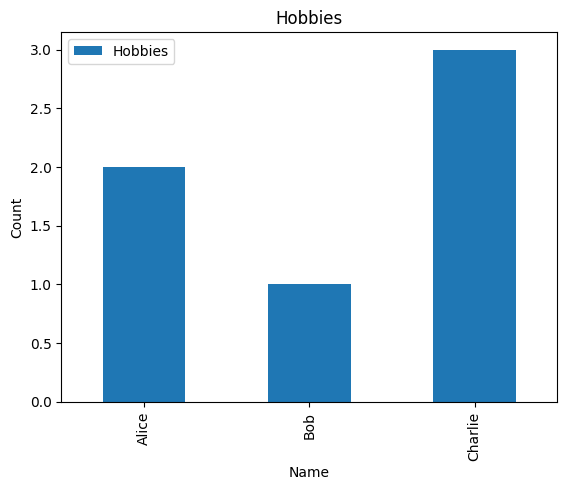

In [13]:
ax = df_exploded.groupby('Name').count().plot(kind='bar', title='Hobbies')
ax.set_xlabel('Name')
ax.set_ylabel('Count')
plt.show()

## indexers: loc, iloc


## Pandas `.loc`

In Pandas, we use the `.loc` property to access and modify data within a DataFrame using **label-based indexing**. It allows us to **select specific rows and columns** based on their labels.

### Syntax
The syntax of `.loc` in Pandas is:

```python
df.loc[row _indexer, column_indexer]


In [ ]:
# create a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 32, 18, 47, 33],
    'City': ['New York', 'Paris', 'London', 'Tokyo', 'Sydney']
}
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,32,Paris
2,Charlie,18,London
3,David,47,Tokyo
4,Eve,33,Sydney


In [ ]:
df.shape

(5, 3)

In [ ]:
df.loc[2]
# access a single row

Name    Charlie
Age          18
City     London
Name: 2, dtype: object

In [ ]:
# access rows 0, 3 and 4
row_list = df.loc[[0, 3, 4]] # select from rows with indexes that are not adjecnet

print("List of Rows:")
row_list


List of Rows:


,Name,Age,City
0,Alice,25,New York
3,David,47,Tokyo
4,Eve,33,Sydney


In [ ]:
# access a list of columns
column_list = df.loc[:  , ['Name', 'Age']]  # : range 1:4, [0,5,8]. : all rows
column_list

,Name,Age
0,Alice,25
1,Bob,32
2,Charlie,18
3,David,47
4,Eve,33


In [ ]:
# access second row of 'Name' column
specific_value = df.loc[3, 'Age']
specific_value

47

In [ ]:
# access second row of 'Name' column
slice_rows = df.loc[1:3, ['Name', 'Age']]

print("Sliced Rows:")
slice_rows

Sliced Rows:


,Name,Age
1,Bob,32
2,Charlie,18
3,David,47


In [ ]:
 # slicing columns from 'Name' to 'Age'
slice_columns = df.loc[:, 'Name':'Age']
slice_columns

,Name,Age
0,Alice,25
1,Bob,32
2,Charlie,18
3,David,47
4,Eve,33


In [ ]:
# boolean indexing with .loc
boolean_index = df.loc[df['Age'] > 30]
boolean_index

,Name,Age,City
1,Bob,32,Paris
3,David,47,Tokyo
4,Eve,33,Sydney


## Pandas `.iloc`

In Pandas, the `.iloc` property is used to access and modify data within a DataFrame using **integer-based indexing**. It allows us to **select specific rows and columns** based on their integer locations.

### Syntax
The syntax of `.iloc` in Pandas is:

```python
df.iloc[row_indexer, column_indexer]


In [ ]:
# access single row
single_row = df.iloc[2]
single_row

Name    Charlie
Age          18
City     London
Name: 2, dtype: object

In [ ]:
# access rows 0, 3 and 4
row_list = df.iloc[[0, 3, 4]]
row_list

,Name,Age,City
0,Alice,25,New York
3,David,47,Tokyo
4,Eve,33,Sydney


In [ ]:
# access columns 0 and 2
column_list = df.iloc[:,[0,1,2]]
column_list

,Name,Age,City
0,Alice,25,New York
1,Bob,32,Paris
2,Charlie,18,London
3,David,47,Tokyo
4,Eve,33,Sydney


In [ ]:
# access a specific value
specific_value = df.iloc[1, 0] # row index 1 and column index 0
specific_value

'Bob'

In [ ]:
specific_value = df.iloc[-1, -1] # row index 1 and column index 0
specific_value

'Sydney'

## Conclusion

### `.loc` vs `.iloc`

The main differences between `.loc` and `.iloc` are as follows:

| Basis               | `.loc`                 | `.iloc`                  |
|---------------------|------------------------|--------------------------|
| Indexing            | Label-based indexing   | Integer-based indexing   |
| Endpoint            | Endpoint is included   | Endpoint is not included |
| Boolean indexing    | Boolean indexing is supported | Boolean indexing is not supported |


## Cut method

In [ ]:
df = pd.DataFrame.from_dict({
    'Name': ['Ray', 'Jane', 'Kate', 'Nik', 'Autumn', 'Kasi', 'Mandeep', 'Evan', 'Kyra', 'Jim'],
    'Age': [12, 7, 33, 34, 45, 65, 77, 11, 32, 55]
})

print(df.head())

# Returns:
#      Name  Age
# 0     Ray   12
# 1    Jane    7
# 2    Kate   33
# 3     Nik   34
# 4  Autumn   45

     Name  Age
0     Ray   12
1    Jane    7
2    Kate   33
3     Nik   34
4  Autumn   45


In [ ]:
df['Age Group'] = pd.cut(
   df['Age'],
   [0, 17, 64, 100]

)
df.head()

# Returns:
#      Name  Age Age Group
# 0     Ray   12   (0, 17]
# 1    Jane    7   (0, 17]
# 2    Kate   33  (17, 64]
# 3     Nik   34  (17, 64]
# 4  Autumn   45  (17, 64]

,Name,Age,Age Group
0,Ray,12,"(0, 17]"
1,Jane,7,"(0, 17]"
2,Kate,33,"(17, 64]"
3,Nik,34,"(17, 64]"
4,Autumn,45,"(17, 64]"


### Adding Labels to Bins in Pandas with cut

In [ ]:
# Adding labels to the groupings
df['Age Group'] = pd.cut(
    df['Age'],
    [0, 17, 64, 100],
    labels=['child', 'adult', 'old']
)
print(df.head())

     Name  Age Age Group
0     Ray   12     child
1    Jane    7     child
2    Kate   33     adult
3     Nik   34     adult
4  Autumn   45     adult
